## Read the datasets

In [75]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [76]:
clt = '''Sampling Distribution of the mean of any independent random variable will be normal'''
clt

'Sampling Distribution of the mean of any independent random variable will be normal'

In [77]:
df1 = pd.read_csv(r'datasets/insurance.csv')
df2 = pd.read_csv(r'datasets/boston.csv')
df3 = pd.read_csv(r'datasets/titanic.csv')

In [78]:
df1.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [79]:
df2.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [80]:
df3.columns

Index(['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest'],
      dtype='object')

In [81]:
series1 = df1.charges
series1 = series1.dropna().reset_index(drop = True)

# Central Limit Theorem

In [ ]:
# generate 5000 samples, each of 500 random positive integers 

In [ ]:
n_samples = 5000
sample_size = 500
data = series1

In [86]:
# data.shape

In [ ]:
min_value = 0
max_value = data.shape[0]

In [88]:
## Random intitation of indexes 

In [92]:
x = np.unique(np.random.randint(min_value, max_value, sample_size)) # unique to remove duplicate indexes & sort the indexes in ascending order
x.mean()

# repeat above N times for N no. of samples

687.6770334928229

#### Create a dictionary with 5000 (say) keys (sample no) with corresponding sample means

In [91]:
b = {} 
for i in range(n_samples):
    x = np.unique(np.random.randint(min_value, max_value, size = sample_size)) # set of random numbers with a specific size
    m = data[x].mean() # Mean of each sample
    b[i] = m   

In [94]:
# b

#### Create a dataframe from the dictionary

In [95]:
c = pd.DataFrame()
c['sample_no'] = b.keys()  # Sample number 
c['sample_mean'] = b.values()  # mean of that particular sample

In [96]:
c.head()

,sample_no,sample_mean
0,0,13465.650713
1,1,13876.006208
2,2,13355.457569
3,3,12560.141364
4,4,13222.842540


In [100]:
print('\u03bc')

μ


In [99]:
print('\u03C3')

σ


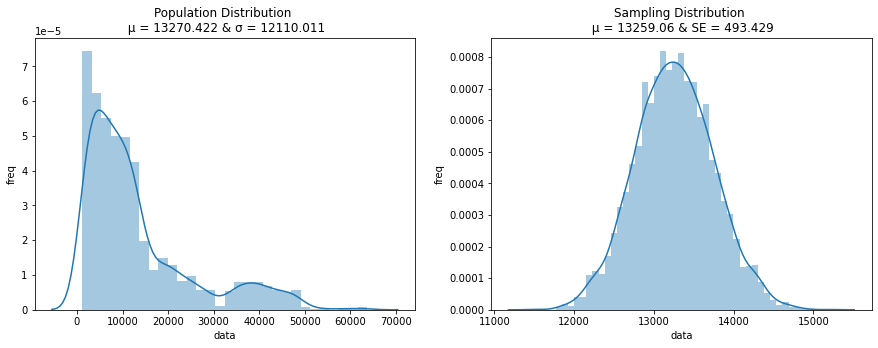

In [102]:
plt.figure(figsize= (15,5))

plt.subplot(1,2,1)
sns.distplot(data)
plt.title(f"Population Distribution \n \u03bc = {round(data.mean(), 3)} & \u03C3 = {round(data.std(),3)}")
plt.xlabel('data')
plt.ylabel('freq')

plt.subplot(1,2,2)
sns.distplot(c.sample_mean)
plt.title(f"Sampling Distribution \n \u03bc = {round(c.sample_mean.mean(), 3)} & SE = {round(c.sample_mean.std(),3)}")
#The standard deviation of the sample means will approach SE (sigma/root(n))
plt.xlabel('data')
plt.ylabel('freq')

plt.show()

### Repeat the experiment for the other features/random variables

In [103]:
def central_limit_theorem(df, col, n_samples = 5000, sample_size = 500):
    """ Using this function to demonstrate Central Limit Theorem. 
        df = data frame
        col = column selected
        n_samples = number of samples to be created
        sample_size = size of the individual sample
        min_value = minimum index of the data
        max_value = len(df) """

    data = df[col]
    data = data.dropna().reset_index(drop = True)
    
    min_value = 0
    max_value = data.shape[0] # len(data)
    
    b = {}
    for i in range(n_samples):
        x = np.unique(np.random.randint(min_value, max_value, size = sample_size)) # set of random numbers with a specific size
        b[i] = data[x].mean()   # Mean of each sample
        
    c = pd.DataFrame()
    c['sample_no'] = b.keys()  # Sample number 
    c['sample_mean'] = b.values()  # mean of that particular sample
    plt.figure(figsize= (15,5))
    
    plt.subplot(1,2,1)
    sns.distplot(data)
    plt.title(f"Population Distribution of '{col}' \n \u03bc = {round(data.mean(), 3)} & \u03C3 = {round(data.std(),3)}")
    plt.xlabel('data')
    plt.ylabel('freq')
    
    plt.subplot(1,2,2)
    sns.distplot(c.sample_mean)
    plt.title(f"Sampling Distribution of '{col}' \n \u03bc = {round(c.sample_mean.mean(), 3)} & SE = {round(c.sample_mean.std(),3)}")
    #The standard deviation of the sample means will approach SE (sigma/root(n))
    plt.xlabel('data')
    plt.ylabel('freq')

    plt.show()

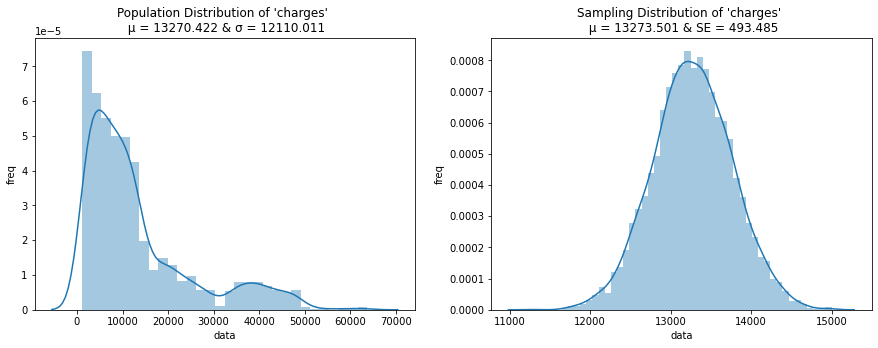

In [104]:
central_limit_theorem(df1, 'charges')

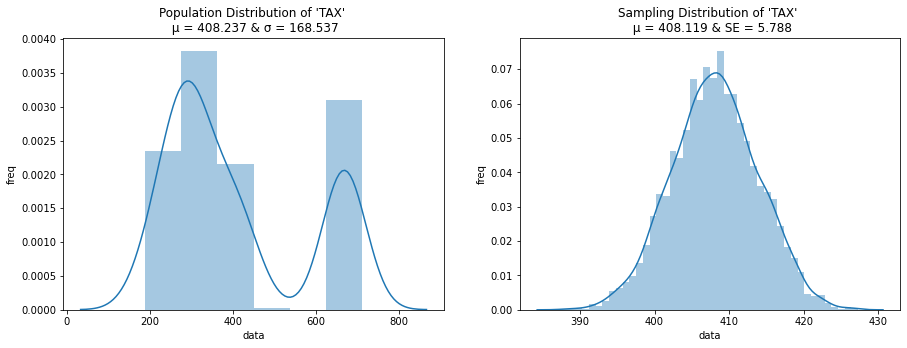

In [105]:
central_limit_theorem(df2, 'TAX')

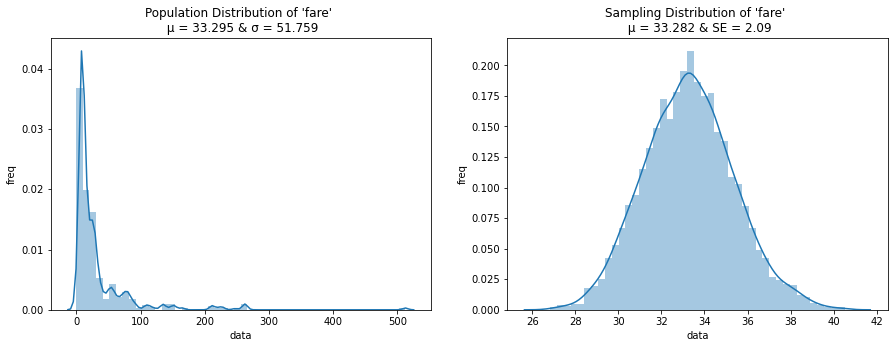

In [106]:
central_limit_theorem(df3, 'fare')

### Homework: Play with the parameters (n_samples and sample_size) and see how the output changes